In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None,'display.max_columns',None)
pd.set_option("precision", 2)

In [2]:
#df = pd.read_csv('Output/filtered_dataset.csv')

In [3]:
# filter Fire department data and only
# fire_df = df[(df['Department Title']=='Fire (LAFD)') &
#             (df['Employment Type']=='Full Time')].copy(deep=True)
# fire_df.to_csv('Output/Fire_Department_Full_Time_Data.csv')

/Users/mohanpanga/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


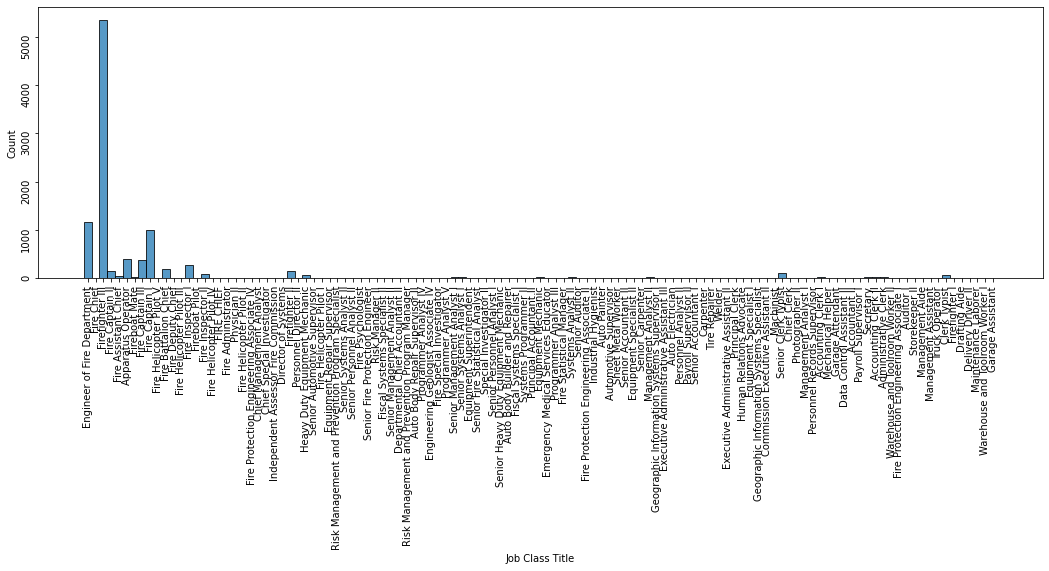

In [4]:
fire_df = pd.read_csv('Output/Fire_Department_Full_Time_Data.csv')
fire_df = fire_df[fire_df['Base Pay']> 0]
fire_df =fire_df[(fire_df['Q1 Payments']> 0) &
       (fire_df['Q2 Payments']> 0) &
       (fire_df['Q3 Payments']> 0) &
       (fire_df['Q4 Payments']> 0)]

fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=fire_df, x='Job Class Title')
ax.tick_params(rotation=90)



In [56]:
# job titles with greater than 100 records
temp = fire_df['Job Class Title'].value_counts()
job_titles = temp[temp>100].index
job_titles

Index(['Firefighter III', 'Engineer of Fire Department', 'Fire Captain I',
       'Apparatus Operator', 'Fire Captain III', 'Fire Inspector I',
       'Fire Battalion Chief', 'Firefighter II', 'Fire Captain II',
       'Senior Clerk Typist'],
      dtype='object')

,Unnamed: 0,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,1,123059,2015,Fire (LAFD),3001.0,1079101020,Engineer of Fire Department,Full Time,38.17,79690.76,69744.50,90006.71,74420.10,65353.98,196893.29,191.84,299525.29,102632.00,7410.00,0.00,1088.0,0.00,187999.29,396.00,8894.00,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2131,0,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2131.pdf
2,4,65133,2014,Fire (LAFD),3001.0,3828116389,Firefighter III,Full Time,38.01,79355.19,45714.77,51080.40,54483.22,147914.96,213146.84,247.71,299193.35,86046.51,16901.74,7035.83,884.0,0.00,101380.45,86944.82,111766.39,23.0,FIREFIGHTERS & FIRE CAPT,38,2112,3,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2112.pdf
3,6,123060,2015,Fire (LAFD),3001.0,832044637,Fire Captain II,Full Time,65.42,136586.52,56016.96,68233.34,104385.66,70463.59,171681.95,134.74,299099.55,127417.60,7279.20,0.00,1088.0,3301.46,160013.29,0.00,11668.66,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2142,2,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
5,8,65134,2014,Fire (LAFD),3001.0,4055219444,Apparatus Operator,Full Time,37.47,78229.16,67026.04,69849.95,78405.06,83432.29,197426.59,194.92,298713.34,101286.75,7408.51,0.00,884.0,2648.19,185957.89,528.00,11468.70,23.0,FIREFIGHTERS & FIRE CAPT,38,2121,0,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2121.pdf
7,11,123062,2015,Fire (LAFD),3001.0,4083098975,Firefighter III,Full Time,37.81,78945.04,61840.48,70370.48,91024.06,74392.59,210469.21,241.48,297627.61,87158.40,21810.00,0.00,1088.0,0.00,187439.21,132.00,23030.00,23.0,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf


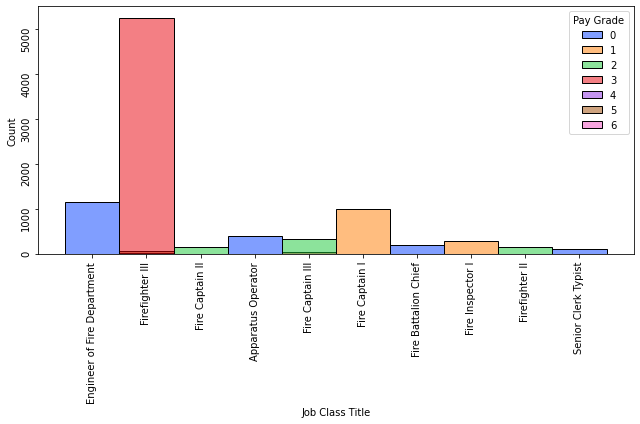

In [57]:
#filtering fire_df for interested job titles

df_final = fire_df[fire_df['Job Class Title'].isin(job_titles)].copy(deep=True)
df_final['Pay Grade'] = df_final['Pay Grade'].astype(int)

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(data=df_final, x='Job Class Title',hue='Pay Grade',palette ='bright')
ax.tick_params(rotation=90)
plt.tight_layout()
plt.savefig('Output/fire_filter_records100_barchart.png')

df_final.head()

In [26]:
df_final['Job Class Title'].value_counts()

Firefighter III                5355
Engineer of Fire Department    1158
Fire Captain I                 1007
Apparatus Operator              403
Name: Job Class Title, dtype: int64

In [27]:
df_final[df_final['Pay Grade']==0]['Job Class Title'].unique()

array(['Engineer of Fire Department', 'Apparatus Operator'], dtype=object)

In [28]:
df_final[df_final['Pay Grade']==1]['Job Class Title'].unique()

array(['Fire Captain I'], dtype=object)

In [29]:
df_final[df_final['Pay Grade']==2]['Job Class Title'].unique()

array([], dtype=object)

In [30]:
df_final[df_final['Pay Grade']==3]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

In [31]:
df_final[df_final['Pay Grade']==4]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

In [32]:
df_final[df_final['Pay Grade']==5]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

In [33]:
df_final[df_final['Pay Grade']==6]['Job Class Title'].unique()

array(['Firefighter III'], dtype=object)

<AxesSubplot:xlabel='% Over Base Pay', ylabel='Count'>

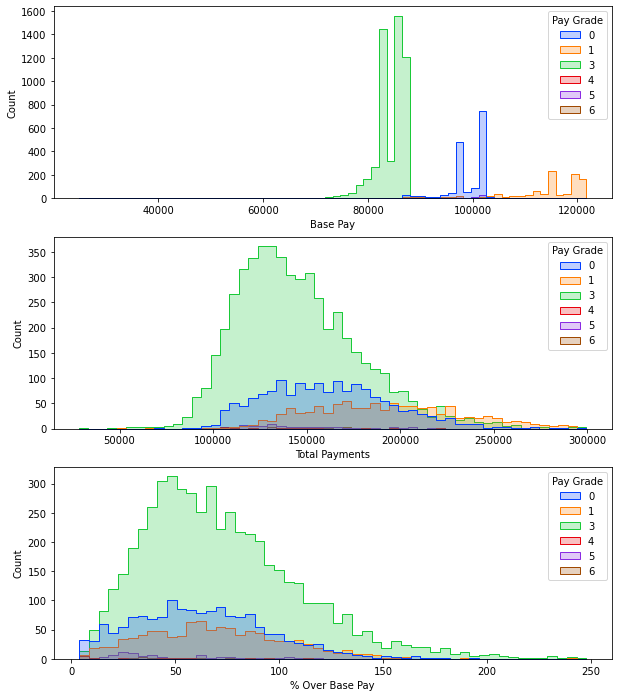

In [34]:
fig, ax = plt.subplots(3, figsize = (10,12))
sns.histplot(data=df_final, x = 'Base Pay', hue='Pay Grade',palette ='bright',element='step',ax = ax[0])
sns.histplot(data=df_final, x = 'Total Payments', hue='Pay Grade',palette ='bright', ax = ax[1],element='step')
sns.histplot(data=df_final, x = '% Over Base Pay', hue='Pay Grade',palette ='bright', ax = ax[2],element='step')

# Base Pay is showing clear bins of data but total payment is not which is indicative of overtime/other payments

(-1.0, 10.0)

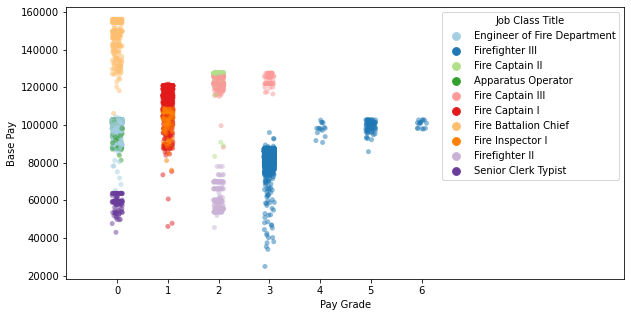

In [58]:
fig,ax = plt.subplots(figsize =(10,5))
sns.stripplot(data=df_final,x='Pay Grade',y='Base Pay',hue='Job Class Title',alpha = 0.5)
plt.xlim(-1,10)

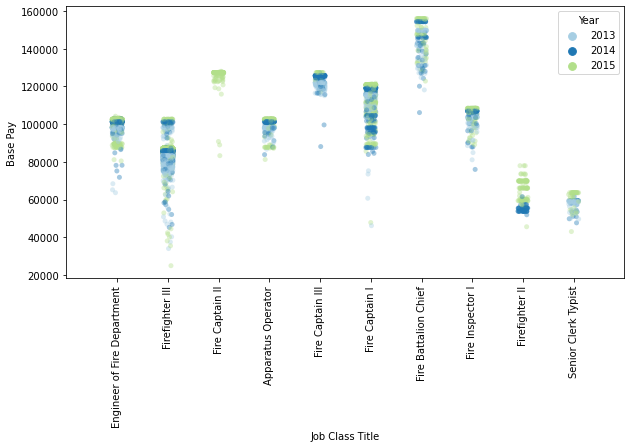

In [59]:
fig,ax = plt.subplots(figsize =(10,5))
sns.stripplot(data=df_final,x='Job Class Title',y='Base Pay',hue='Year',alpha = 0.4)
# sns.boxplot(data=df_final,x='Job Class Title',y='Base Pay')
plt.xlim(-1,10)
ax.tick_params(axis ='x',rotation=90)

In [37]:
group_data = df_final.groupby(['Pay Grade','Job Class Title','Year'])

In [38]:
summary = group_data['Base Pay','Total Payments'].mean()
# summary.pivot(columns='Year')
summary.unstack(level=-1)
# summary

<ipython-input-38-7fe23db64f91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = group_data['Base Pay','Total Payments'].mean()


Base Pay                        \
Year                                        2013       2014       2015   
Pay Grade Job Class Title                                                
0         Apparatus Operator            97520.40  100454.44   99934.94   
          Engineer of Fire Department   97518.28  100470.08  100204.14   
1         Fire Captain I               114026.65  112696.93  113601.00   
3         Firefighter III               81963.96   85054.54   86115.35   
4         Firefighter III               97378.12   99936.12   95207.49   
5         Firefighter III               96522.25  100020.34  101250.51   
6         Firefighter III               98089.76  101039.80  102297.95   

                                      Total Payments                        
Year                                            2013       2014       2015  
Pay Grade Job Class Title                                                   
0         Apparatus Operator               146433.34  163276.94  177492.10  
          Engineer of Fire Department      149001.67  165209.38  172662.73  
1         Fire Captain I                   193036.33  189746.52  195016.25  
3         Firefighter III                  135648.90  146475.17  156216.91  
4         Firefighter III                  132387.87  144630.63  141281.01  
5         Firefighter III                  138716.52  145627.68  157577.66  
6         Firefighter III                  147912.43  155498.68  161706.16

In [39]:
df_final['Year'].unique()

array([2015, 2014, 2013])

<AxesSubplot:xlabel='Pay Grade', ylabel='Base Pay'>

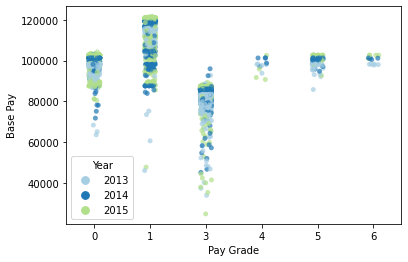

In [40]:
sns.stripplot(data=df_final,x='Pay Grade',y='Base Pay',hue='Year',alpha = 0.7)

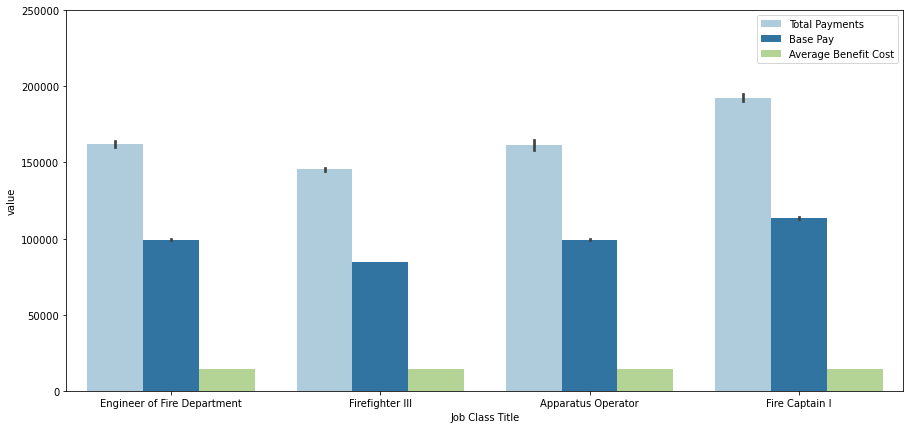

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
wp_data=pd.melt(df_final,id_vars=['Job Class Title'],value_vars=['Total Payments','Base Pay', 'Average Benefit Cost'],var_name='Year')
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='Job Class Title',y='value',data=wp_data,hue='Year')
ax.tick_params(rotation=0)
plt.ylim(0,250000)
plt.legend(loc='upper right')

In [43]:
wp_df_final = df_final.copy(deep = True)
water_df = wp_df_final.groupby(['Job Class Title', 'Year'])
water_data = water_df.mean()
water_data = water_data[['Total Payments', 'Base Pay', 'Average Benefit Cost', 'Payments Over Base Pay', '% Over Base Pay' ]]
water_data

Total Payments   Base Pay  \
Job Class Title             Year                              
Apparatus Operator          2013       146433.34   97520.40   
                            2014       163276.94  100454.44   
                            2015       177492.10   99934.94   
Engineer of Fire Department 2013       149001.67   97518.28   
                            2014       165209.38  100470.08   
                            2015       172662.73  100204.14   
Fire Captain I              2013       193036.33  114026.65   
                            2014       189746.52  112696.93   
                            2015       195016.25  113601.00   
Firefighter III             2013       135712.69   82253.53   
                            2014       146482.83   85354.62   
                            2015       156216.30   86399.29   

                                  Average Benefit Cost  \
Job Class Title             Year                         
Apparatus Operator          2013              14073.96   
                            2014              14054.28   
                            2015              14106.84   
Engineer of Fire Department 2013              14073.96   
                            2014              14054.28   
                            2015              14106.84   
Fire Captain I              2013              14073.96   
                            2014              14054.28   
                            2015              14106.84   
Firefighter III             2013              14073.96   
                            2014              14054.28   
                            2015              14106.84   

                                  Payments Over Base Pay  % Over Base Pay  
Job Class Title             Year                                           
Apparatus Operator          2013                48912.94            50.16  
                            2014                62822.50            62.34  
                            2015                77557.17            77.23  
Engineer of Fire Department 2013                51483.39            52.68  
                            2014                64739.30            64.30  
                            2015                72458.60            71.92  
Fire Captain I              2013                79009.68            69.11  
                            2014                77049.59            68.36  
                            2015                81415.24            72.01  
Firefighter III             2013                53459.16            64.86  
                            2014                61128.20            71.58  
                            2015                69817.00            80.65

In [53]:
water_data['% increase Tot Pay'] = water_data['Total Payments'].groupby(level=0).pct_change()*100
water_data['% increase Base Pay'] = water_data['Base Pay'].groupby(level=0).pct_change()*100
water_data['% increase Benefits'] = water_data['Average Benefit Cost'].groupby(level=0).pct_change()*100
water_data['Cum % increase Tot Pay'] = water_data['% increase Tot Pay'].groupby(level=0).cumsum()
water_data['Cum % increase Base Pay'] = water_data['% increase Base Pay'].groupby(level=0).cumsum()
water_data['Cum % increase Benefits'] = water_data['% increase Benefits'].groupby(level=0).cumsum()
water_data.reset_index(inplace=True)

In [123]:
years = [2014, 2015]
water_data_file = water_data[water_data['Year'].isin(years)]
# water_data_file  = water_data_file [['Job Class Title', 'Year', 'Cum % increase Tot Pay', 'Cum % increase Base Pay','Cum % increase Benefits']]
water_data_file.to_csv('Output/FireDepartment_percentChange.csv')

In [115]:
fire_pct = water_data_file.copy(deep=True)


In [116]:
fire_pct.reset_index(inplace=True)
fire_pct

,index,Job Class Title,Year,Total Payments,Base Pay,Average Benefit Cost,Payments Over Base Pay,% Over Base Pay,% increase Tot Pay,% increase Base Pay,% increase Benefits,Cum % increase Tot Pay,Cum % increase Base Pay,Cum % increase Benefits
0,1,Apparatus Operator,2014,163276.94,100454.44,14054.28,62822.50,62.34,11.50,3.01,-0.14,11.50,3.01,-0.14
1,2,Apparatus Operator,2015,177492.10,99934.94,14106.84,77557.17,77.23,8.71,-0.52,0.37,20.21,2.49,0.23
2,4,Engineer of Fire Department,2014,165209.38,100470.08,14054.28,64739.30,64.30,10.88,3.03,-0.14,10.88,3.03,-0.14
3,5,Engineer of Fire Department,2015,172662.73,100204.14,14106.84,72458.60,71.92,4.51,-0.26,0.37,15.39,2.76,0.23
4,7,Fire Captain I,2014,189746.52,112696.93,14054.28,77049.59,68.36,-1.70,-1.17,-0.14,-1.70,-1.17,-0.14
5,8,Fire Captain I,2015,195016.25,113601.00,14106.84,81415.24,72.01,2.78,0.80,0.37,1.07,-0.36,0.23
6,10,Firefighter III,2014,146482.83,85354.62,14054.28,61128.20,71.58,7.94,3.77,-0.14,7.94,3.77,-0.14
7,11,Firefighter III,2015,156216.30,86399.29,14106.84,69817.00,80.65,6.64,1.22,0.37,14.58,4.99,0.23


In [117]:
water_pct= pd.read_csv('Output/Water_Power.csv')
# del water_pct['Unnamed: 0']
water_pct

,Unnamed: 0,Job Class Title,Year,Cum % increase Tot Pay,Cum % increase Base Pay,Cum % increase Benefits
0,1,Commercial Service Representative,2014,-6.43e+00,-3.28,5.92
1,2,Commercial Service Representative,2015,-9.70e+00,-5.52,9.41
2,4,Electric Distribution Mechanic,2014,6.73e+00,-0.71,5.92
3,5,Electric Distribution Mechanic,2015,1.03e+01,-2.30,9.41
4,7,Electrical Engineering Associate,2014,-9.69e-02,-1.79,5.92
5,8,Electrical Engineering Associate,2015,-3.92e-01,-3.79,9.41
6,10,Senior Clerk Typist,2014,-9.60e-03,0.30,5.92
7,11,Senior Clerk Typist,2015,-5.98e-01,-0.92,9.41


In [90]:
parks_pct= pd.read_csv('Output/Recreation_parks.csv')
parks_pct
police_pct= pd.read_csv('Output/Police_Dpt.csv')
police_pct

,Unnamed: 0,Job Class Title,Year,Cum % increase Tot Pay,Cum % increase Base Pay,Cum % increase Benefits
0,1,Police Detective II,2014,9.24,3.07,2.37
1,2,Police Detective II,2015,14.86,3.34,2.34
2,4,Police Officer II,2014,8.42,3.68,2.37
3,5,Police Officer II,2015,13.60,6.56,2.34
4,7,Police Officer III,2014,7.64,2.51,2.37
5,8,Police Officer III,2015,11.32,2.82,2.34
6,10,Police Sergeant I,2014,6.13,2.80,2.37
7,11,Police Sergeant I,2015,8.25,2.37,2.34


In [86]:
# merge_pct = pd.merge(fire_pct,water_pct,on='Job Class Title', how = 'outer',suffixes=['_fire','_water'])
# merge_pct = pd.merge(merge_pct,parks_pct,on='Job Class Title', how = 'outer',suffixes=['','_parks'])
# merge_pct

In [91]:
merge_df = fire_pct.append(water_pct, ignore_index=True)
merge_df = merge_df.append(parks_pct,ignore_index=True )
merge_df = merge_df.append(police_pct,ignore_index=True )
merge_df

,index,Job Class Title,Year,Cum % increase Tot Pay,Cum % increase Base Pay,Cum % increase Benefits,Unnamed: 0
0,1.0,Apparatus Operator,2014,1.15e+01,3.01,-0.14,NaN
1,2.0,Apparatus Operator,2015,2.02e+01,2.49,0.23,NaN
2,4.0,Engineer of Fire Department,2014,1.09e+01,3.03,-0.14,NaN
3,5.0,Engineer of Fire Department,2015,1.54e+01,2.76,0.23,NaN
4,7.0,Fire Captain I,2014,-1.70e+00,-1.17,-0.14,NaN
5,8.0,Fire Captain I,2015,1.07e+00,-0.36,0.23,NaN
6,10.0,Firefighter III,2014,7.94e+00,3.77,-0.14,NaN
7,11.0,Firefighter III,2015,1.46e+01,4.99,0.23,NaN
8,NaN,Commercial Service Representative,2014,-6.43e+00,-3.28,5.92,1.0
9,NaN,Commercial Service Representative,2015,-9.70e+00,-5.52,9.41,2.0


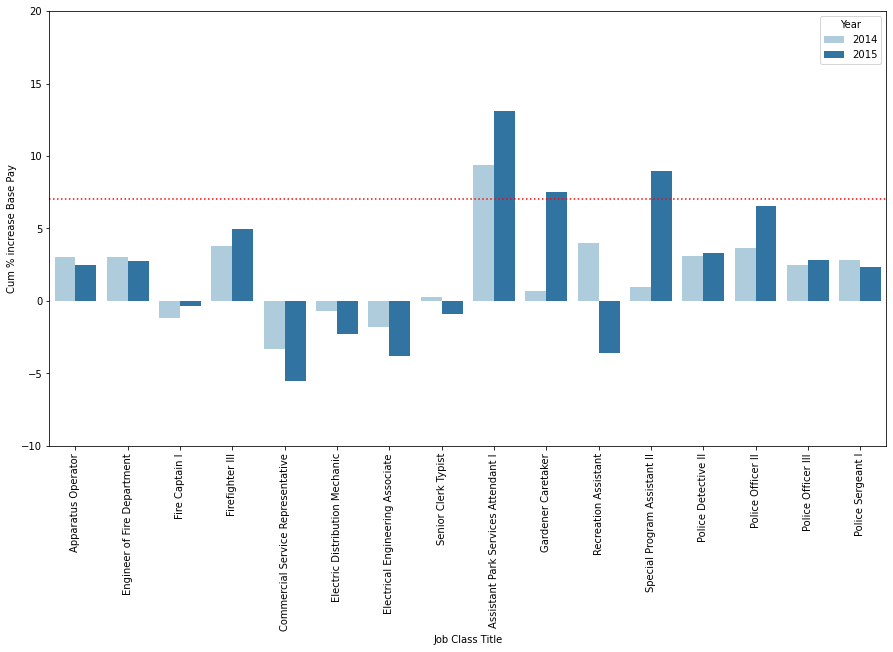

In [113]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Job Class Title', y = 'Cum % increase Base Pay', hue ='Year', data = merge_df)
ax.tick_params(axis='x', rotation = 90)
ax.set(ylim = (-10, 20))
ax.axhline(y=7, color ='r',linestyle=':')

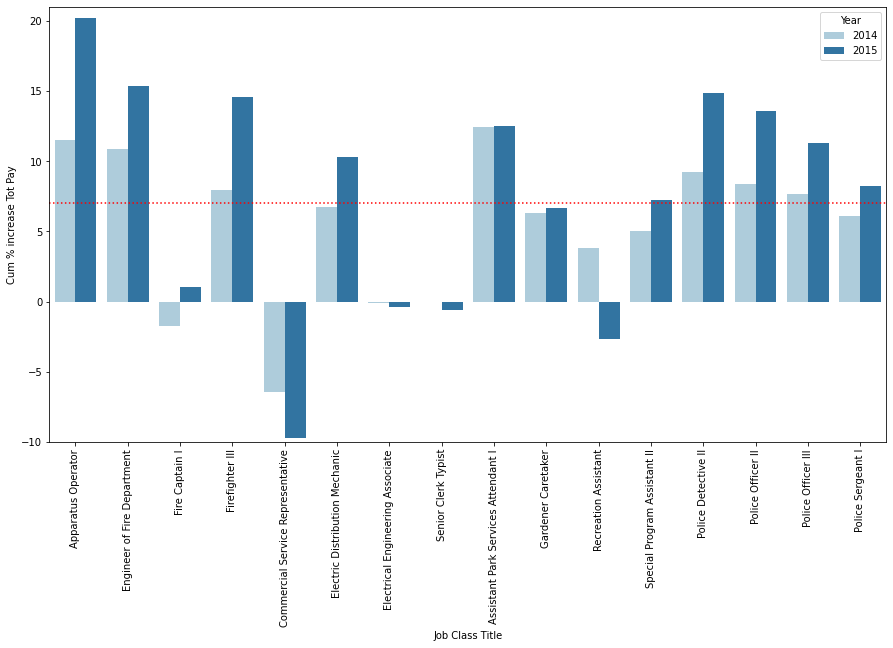

In [122]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Job Class Title', y = 'Cum % increase Tot Pay', hue ='Year', data = merge_df)
ax.tick_params(axis='x', rotation = 90)
ax.set(ylim = (-10, 21))
ax.axhline(y=7, color ='r',linestyle=':')